In [1]:
%matplotlib inline
import numpy as np
import math
from scipy import stats as stats
import matplotlib.pyplot as plt

# Ước lượng điểm

VD1: Sử dụng ước lượng điểm để ước lượng tham số của quần thể

In [2]:
#Khởi tạo một quần thể cho trước thể hiện chiều cao(cm) của 5 thanh 
SMALL_POP = np.array([186, 182, 157, 158, 152])
print(SMALL_POP)
mean_of_SMALL_POP = np.mean(SMALL_POP)
print('Chiều cao trung bình của Quần Thể : {}'.format(mean_of_SMALL_POP))

#Lấy ngẫu nhiên một mẫu có kích thước là 4, và tính chiều cao trung bình và so sánh với giá trị của quần thể
np.random.seed(24)
sample1 = np.random.choice(SMALL_POP, size=4, replace=True)
sample1_mean = np.mean(sample1)
print('Mẫu ngẫu nhiên 1: ', sample1)
print('Chiều cao trung bình của mẫu 1: {}'.format(sample1_mean))
print('Sai số ước lượng: {}'.format(abs(sample1_mean - mean_of_SMALL_POP)))

[186 182 157 158 152]
Chiều cao trung bình của Quần Thể : 167.0
Mẫu ngẫu nhiên 1:  [157 158 186 182]
Chiều cao trung bình của mẫu 1: 170.75
Sai số ước lượng: 3.75


Nhận xét: Sai số ước lượng là: 3.75cm. Ta có thể chấp nhận được với bài toán đo chiều cao

VD2: Để cho việc đo sai số khách quan, ta thử lặp lại việc lấy mẫu trên 10 lần, và tính sai số ước lượng

In [3]:
mean_array = np.empty(10)
for i in range(10):
        random_sample = np.random.choice(SMALL_POP, size=4, replace=True)
        random_sample_mean = np.mean(random_sample)
        mean_array[i] = random_sample_mean
        
print('Chiều cao trung bình của 10 mẫu thu được: ', mean_array) 
print('Sai số ước lượng: {}'.format(abs(np.mean(mean_array) - mean_of_SMALL_POP)))

Chiều cao trung bình của 10 mẫu thu được:  [168.5  156.25 164.   162.25 175.5  174.5  170.75 169.75 162.25 169.5 ]
Sai số ước lượng: 0.32499999999998863


Nhận xét: Ta nhận thấy, khi thực hiện việc lấy mẫu nhiều lần, sai số trung bình có nhỏ hơn so với ví dụ trên.

Câu hỏi: nếu ta có khả năng lấy mẫu được nhiều lần, liệu rằng ta có thể lấy mẫu 1 lần với mẫu có nhiều phần tử thì kết quả có khác không?

VD3: Minh hoạ ảnh hưởng của cỡ mẫu đến độ chính xác của ước lượng
    - Để rõ ràng ta sẽ tạo một quần thể mới gồm 100 cá thể: MEDUIUM_POP
    - Lần lượt lấy mẫu với kích cỡ khác nhau sample_size = 1, 2, 3, ... và tính trung bình mẫu: mean_array
    - Trực quan bẳng đồ thị

[  0.         143.         170.5        152.33333333 162.25
 173.2        173.83333333 176.28571429 161.625      165.22222222
 167.5        172.63636364 170.16666667 164.46153846 164.14285714
 165.33333333 165.25       171.35294118 176.05555556 166.15789474
 161.65       165.04761905 164.31818182 161.13043478 158.125
 161.4        166.11538462 164.25925926 172.67857143 164.79310345
 165.73333333 163.87096774 165.28125    159.12121212 165.23529412
 166.11428571 165.33333333 163.16216216 168.60526316 170.20512821
 166.475      165.65853659 163.02380952 165.23255814 163.18181818
 164.15555556 168.86956522 167.91489362 168.29166667 166.26530612
 166.54       171.09803922 175.63461538 168.37735849 168.98148148
 160.67272727 160.89285714 168.1754386  167.17241379 161.54237288
 163.25       164.7704918  167.72580645 165.47619048 165.21875
 165.93846154 162.34848485 165.62686567 167.11764706 164.02898551
 163.41428571 168.66197183 166.01388889 166.39726027 165.51351351
 165.62666667 165.039473

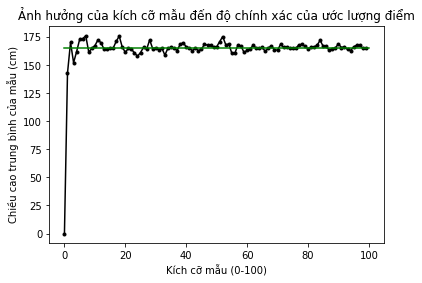

In [4]:
MEDIUM_POP = np.random.randint(130, 200, size=100)
mean_of_MEDIUM_POP = np.mean(MEDIUM_POP)
mean_array = np.empty(100)
mean_array[0] = 0

for sample_size in range(1, 100):
    temp = np.random.choice(MEDIUM_POP, size=sample_size)
    mean_array[sample_size] = np.mean(temp)

x = np.arange(100)
plt.plot(x, mean_array, marker='.', color='black')

plt.xlabel('Kích cỡ mẫu (0-100)')
plt.ylabel('Chiều cao trung bình của mẫu (cm)')
plt.title('Ảnh hưởng của kích cỡ mẫu đến độ chính xác của ước lượng điểm')
    
xx = np.array([0, 100])
yy = np.empty(2)
yy[0] = yy[1] = mean_of_MEDIUM_POP

plt.plot(xx, yy, color='green')
print(mean_array)
plt.show()

Nhận xét: Qua ví dụ trên ta có thể nhận thấy kích thước mẫu có liên quan đến độ chính xác của ước lượng điểm
Kết luận: Để tăng độ chính xác của ước lượng ta có thể tăng kích thước của quần thể

# Ước lượng khoảng

VD4: Để tăng độ chính xác ta sử dụng ước lượng khoảng thay thế cho ước lượng điểm
Trước tiên, ta thực hiện ước lượng điểm 20 lần với cỡ mẫu mỗi lần là 40 để xem xét kết quả của mỗi lần ước lượng

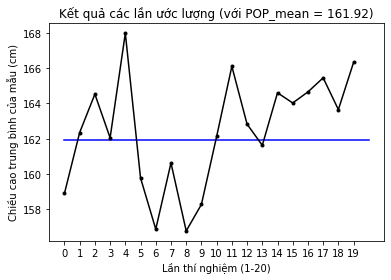

In [5]:
MEDIUM_POP = np.random.randint(130, 200, size=100)
mean_of_MEDIUM_POP = np.mean(MEDIUM_POP)

np.random.seed(24)

estimate_times = 20
mean_array = np.empty(estimate_times)
for i in range(estimate_times):
    a_sample = np.random.choice(MEDIUM_POP, size=40)
    mean_array[i] = np.mean(a_sample)

#Vẽ giá trị thực tế (mean của quần thể)
plt.plot(np.asarray([0, estimate_times]), np.asarray([mean_of_MEDIUM_POP, mean_of_MEDIUM_POP]), color='blue')
    
#Vẽ các kết quả ước lượng
x = np.arange(20)
plt.plot(x, mean_array, marker='.', color='black')

plt.xticks(np.arange(0, estimate_times, step=1))
plt.xlabel('Lần thí nghiệm (1-20)')
plt.ylabel('Chiều cao trung bình của mẫu (cm)')
plt.title('Kết quả các lần ước lượng (với POP_mean = {})'.format(mean_of_MEDIUM_POP))
plt.show()

Nhận xét: Kết quả ước lượng nằm dao động xung quanh giá trị thực tế, có kết quả gần giá trị thực tế, nhưng cũng có kết quả rất xa
    - Hạn chế của ước lượng điểm: kết quả mỗi lần khác nhau, và có kết quả có sai số rất lớn
    - Để tăng độ chính xác của ước lượng thay vì dủng điểm ước lượng ta dùng một khoảng

VD5: Ta vẽ lại biểu đồ trên nhưng thay vì dùng điểm ước lượng ta dùng khoảng ước lượng
Giả sử ta cho phép biên độ lỗi là error_margin = 3cm, như vậy khoảng ước lượng sẽ là [point_estimate - 3, point_estimate + 3]
Sau đó ta tỷ lệ chính xác của ước lượng bằng cách tìm tỷ lệ phần trăm kết quả ước lượng đúng

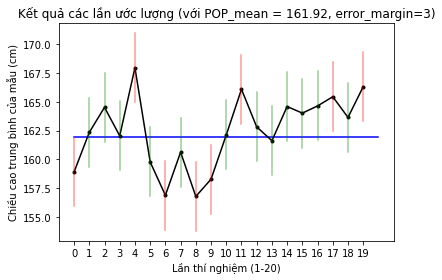

Tỷ lệ chính xác của ước lượng: 0.6


In [6]:
#Vẽ giá trị thực tế (mean của quần thể)
plt.plot(np.asarray([0, estimate_times]), np.asarray([mean_of_MEDIUM_POP, mean_of_MEDIUM_POP]), color='blue')

#Vẽ các kết quả ước lượng
x = np.arange(20)
plt.plot(x, mean_array, marker='.', color='black')

#Vẽ khoảng ước lượng với biên độ lỗi là 3cm
error_margin = 3
true_result = 0;
for i in range(estimate_times):
    xx = np.asarray([i, i])
    lower = mean_array[i] - error_margin
    upper = mean_array[i] + error_margin
    yy = np.asarray([lower, upper])
    if (mean_of_MEDIUM_POP <= upper and mean_of_MEDIUM_POP >= lower):
        plt.plot(xx, yy, color='green', alpha=0.4)
        true_result = true_result + 1
    else:
        plt.plot(xx, yy, color='red', alpha=0.4)

plt.xticks(np.arange(0, estimate_times, step=1))
plt.xlabel('Lần thí nghiệm (1-20)')
plt.ylabel('Chiều cao trung bình của mẫu (cm)')
plt.title('Kết quả các lần ước lượng (với POP_mean = {}, error_margin={})'.format(mean_of_MEDIUM_POP, error_margin))
plt.show()

print('Tỷ lệ chính xác của ước lượng: {}'.format(true_result/estimate_times))

Nhận xét:
    - Kết quả ước lượng khoảng vẫn có thể sai (không chứa giá trị thực tế)
    - Để tăng độ chính xác có thể tăng độ rộng của khoảng ước lượng (tăng error_margin) --> Xem như bài tập
    - Nếu khoảng ước lượng quá rộng thì ta khó tìm giá trị thực sự trong khoảng ấy. Vậy thì độ rộng của khoảng ước lượng bao nhiêu là đủ?

VD6: Như vậy, để thực hiện bài toán ước lượng, ta phải cân nhắc giữa 2 yếu tố là: độ rộng khoảng và độ chính xác của ước lượng.
    - Giả sử ta chấp nhận giảm độ chính xác của ước lượng xuống 95% để đổi lấy một khoảng ước lượng bé hơn
    - Điều này có nghĩa là xác suất có được một khoảng ước lượng chứa giá trị thực tế là 95%
    - Để làm điều này ta sử dụng định lý Giới Hạn Trung Tâm
    - Với độ tin cậy của ước lượng là 95%, ta sẽ tìm biên độ lỗi dựa vào một chọn ngẫu nhiên một mẫu có cùng kích cỡ

In [10]:
#Tạo ngẫu nhiên một mẫu có kích thước 40 từ MEDIUM_POP
sample2 = np.random.choice(MEDIUM_POP, size=40)
mean_sample2 = np.mean(sample2)
#Chuẩn bị các thông số
n = sample2.size
degree_of_freedom = n - 1
confidence_value = 0.95
t_score = stats.t.ppf(confidence_value, degree_of_freedom)
standard_error = sample2.std() / math.sqrt(n)
error_margin = t_score * standard_error
print('Biên độ lỗi với độ tin cậy là 95%: {}'.format(error_margin))

Biên độ lỗi với độ tin cậy là 95%: 5.235323284061324


VD7: Chạy lại VD5 với biên độ lỗi mới, và kiểm tra tỷ lệ ước lượng chính xác

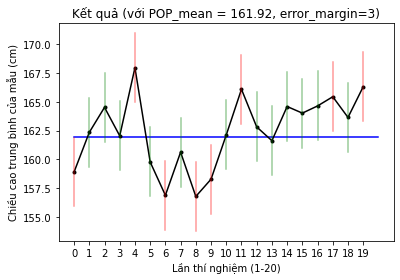

Tỷ lệ chính xác của ước lượng: 0.6


In [7]:
#Vẽ giá trị thực tế (mean của quần thể)
plt.plot(np.asarray([0, estimate_times]), np.asarray([mean_of_MEDIUM_POP, mean_of_MEDIUM_POP]), color='blue')

#Vẽ các kết quả ước lượng
x = np.arange(20)
plt.plot(x, mean_array, marker='.', color='black')

#Vẽ khoảng ước lượng với biên độ lỗi mới
true_result = 0;
for i in range(estimate_times):
    xx = np.asarray([i, i])
    lower = mean_array[i] - error_margin
    upper = mean_array[i] + error_margin
    yy = np.asarray([lower, upper])
    if (mean_of_MEDIUM_POP <= upper and mean_of_MEDIUM_POP >= lower):
        plt.plot(xx, yy, color='green', alpha=0.4)
        true_result = true_result + 1
    else:
        plt.plot(xx, yy, color='red', alpha=0.4)

plt.xticks(np.arange(0, estimate_times, step=1))
plt.xlabel('Lần thí nghiệm (1-20)')
plt.ylabel('Chiều cao trung bình của mẫu (cm)')
plt.title('Kết quả (với POP_mean = {}, error_margin={})'.format(mean_of_MEDIUM_POP, error_margin))
plt.show()

print('Tỷ lệ chính xác của ước lượng: {}'.format(true_result/estimate_times))

Nhận xét: Qua ví dụ trên ta thấy với biên độ lỗi được tính từ độ tin cậy mong muốn là 95%. Ta được tỷ lệ chính xác của ước lượng cũng là 95% (với số lần thực hiện là 20)
Bạn hãy thử tăng số lần thực hiện lên 100 hay 1000 lần xem tỷ lệ này còn chính xác không?